# **Connected scatterplot**

#### คือการผสมผสานระหว่าง Scatterplot และ Lineplot 

> #### โดยใส่ฟังก์ชั่น geom_point() ในฟังก์ชั่น geom_line()


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




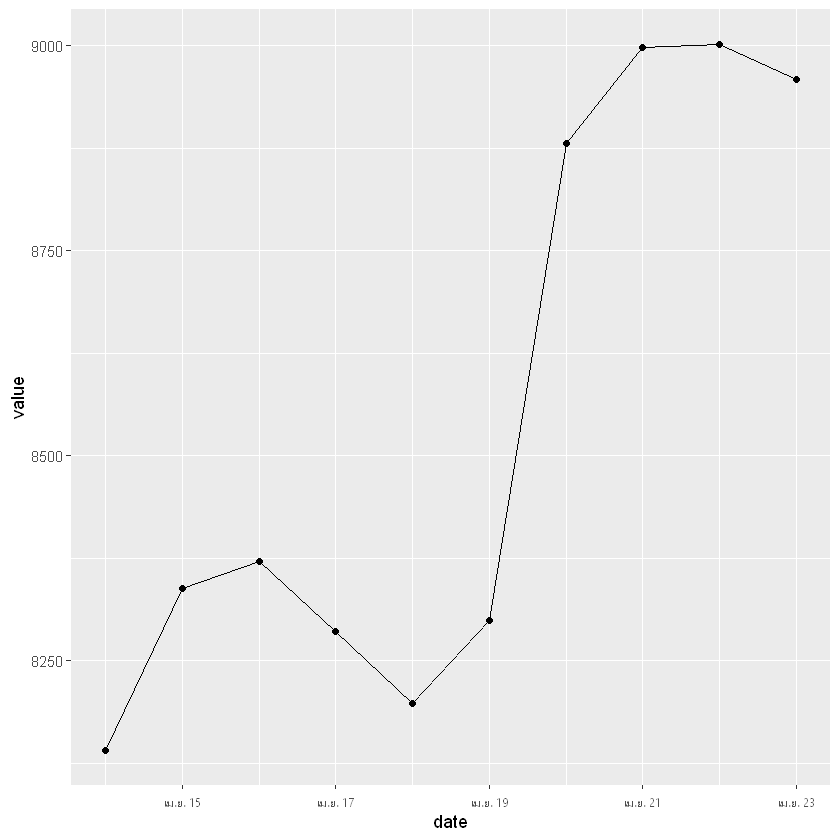

In [2]:
# Libraries
library(ggplot2)
library(dplyr)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", header=T)
data$date <- as.Date(data$date)

# Plot
data %>%
  tail(10) %>%
  ggplot( aes(x=date, y=value)) +
    geom_line() +
    geom_point()

### **กำหนดการเชื่อมกันของแต่ละจุด**

> #### กำหนดธีมด้วย **theme_ipsum()** , กำหนดชื่อกราฟด้วย **ggtitle()**

> #### กำหนดสี รูปร่าง ขนาด ด้วย **Color, Shape, Size**

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see http://bit.ly/arialnarrow

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Window

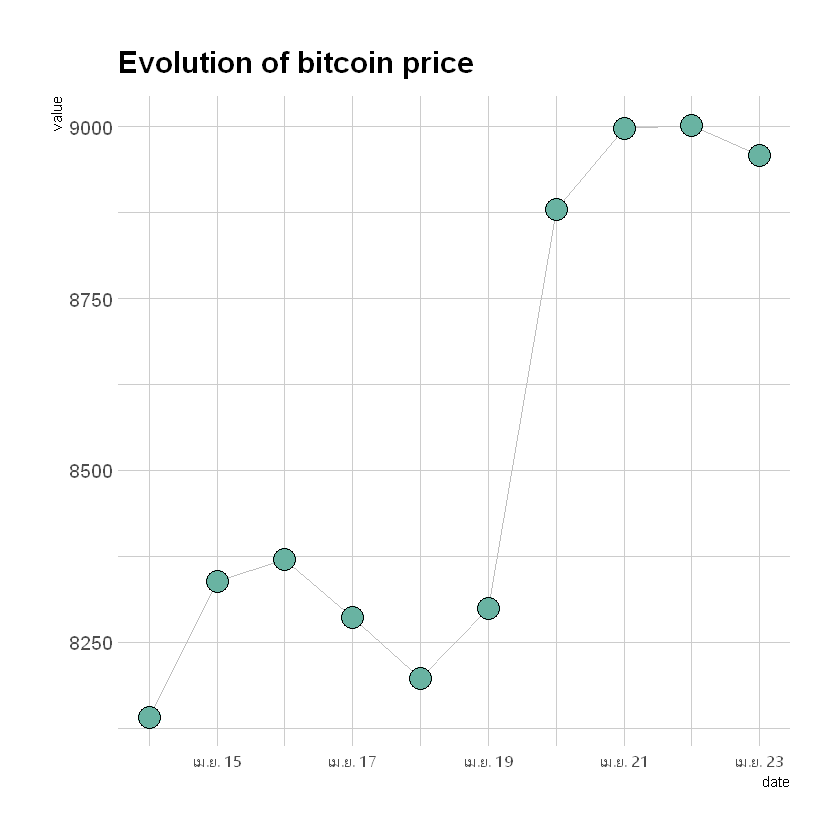

In [6]:
# Libraries
library(ggplot2)
library(dplyr)
library(hrbrthemes)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", header=T)
data$date <- as.Date(data$date)

# Plot
data %>%
  tail(10) %>%
  ggplot( aes(x=date, y=value)) +
    geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#69b3a2", size=6) +
    theme_ipsum() +
    ggtitle("Evolution of bitcoin price")

### **เชื่อมโยง Scatterplot เพื่อแสดงวิวัฒนาการของข้อมูล**

> #### ให้ใช้ **geom_segment() แทน geom_line()** เนื่องจาก geom_line() จะหาข้อมูลที่ขึ้นกับตัวแปรที่มีโดยอัตโนมัติ

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'babynames' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\RtmpAvoAN1\downloaded_packages


Warning message:
"Removed 1 rows containing missing values (geom_segment)."


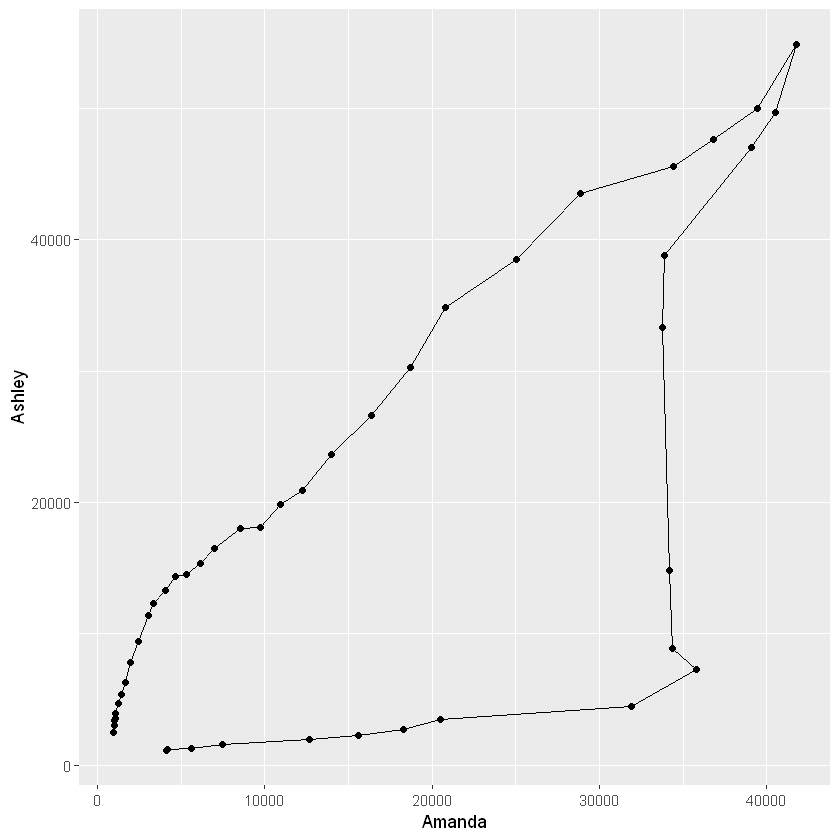

In [8]:
install.packages("babynames")
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)

# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# plot
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point() +
     geom_segment(aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  )
      ) 

#### **การใส่ลูกศรเพื่อชี้ทิศทางของกราฟ จะช่วยให้ผู้อ่านเข้าใจได้มากยิ่งขึ้น**

Warning message:
"Removed 1 rows containing missing values (geom_segment)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning

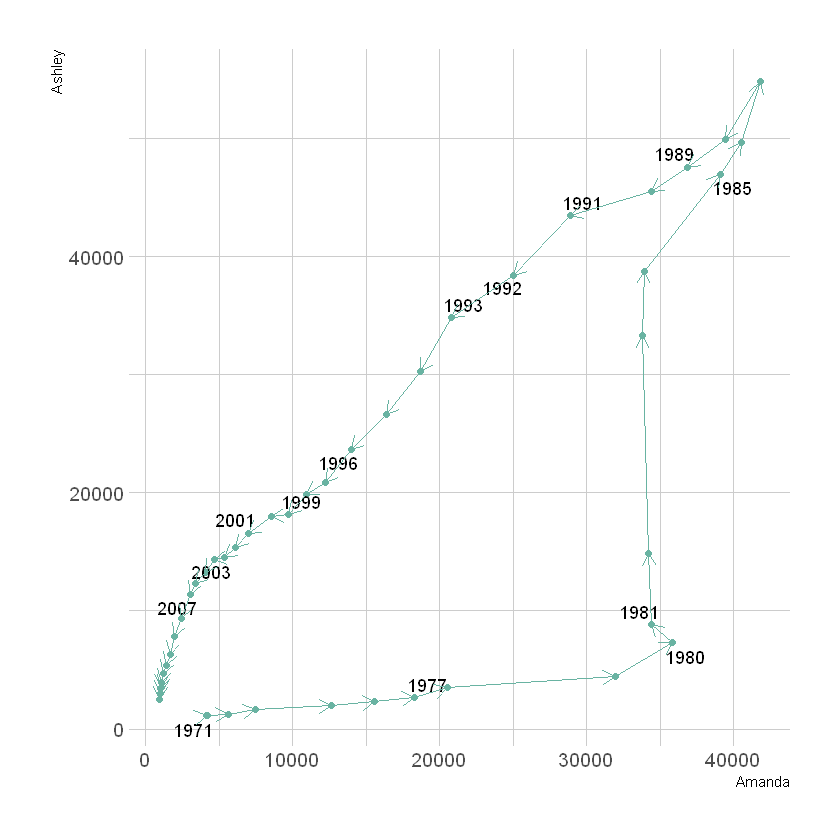

In [9]:
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)

# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# Select a few date to label the chart
tmp_date <- data %>% sample_frac(0.3)

# plot 
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point(color="#69b3a2") +
     geom_text_repel(data=tmp_date) +
     geom_segment(color="#69b3a2", 
                  aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  ),
                  arrow=arrow(length=unit(0.3,"cm"))
      ) +
      theme_ipsum()